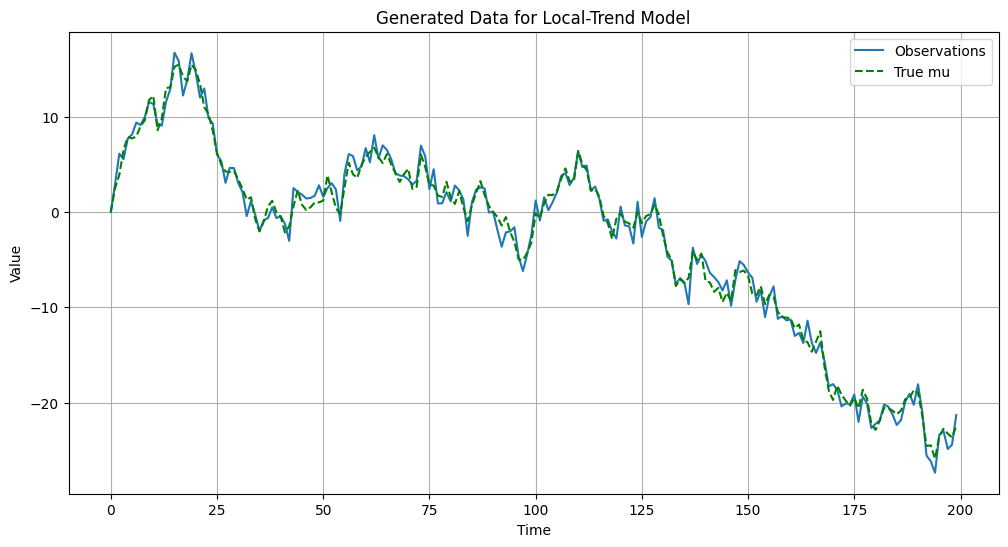

In [1]:
#1.
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 200  # number of time steps
mu_0 = 0  # initial value for mu
mu_variance = 2
e_variance = 1

# Generate data for the local-trend model
np.random.seed(0)  # for reproducibility

mu_true = np.zeros(T)
y = np.zeros(T)

for t in range(1, T):
    mu_true[t] = mu_true[t-1] + np.random.normal(0, np.sqrt(mu_variance))
    y[t] = mu_true[t] + np.random.normal(0, np.sqrt(e_variance))

# Plot the generated data
plt.figure(figsize=(12, 6))
plt.plot(range(T), y, label='Observations')
plt.plot(range(T), mu_true, label='True mu', linestyle='--', color='green')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Generated Data for Local-Trend Model')
plt.legend()
plt.grid(True)
plt.show()

Parameter Estimates:
Trend Variance (μ variance): 109.76780090752031
Observation Variance (ε variance): 0.22536427619092586


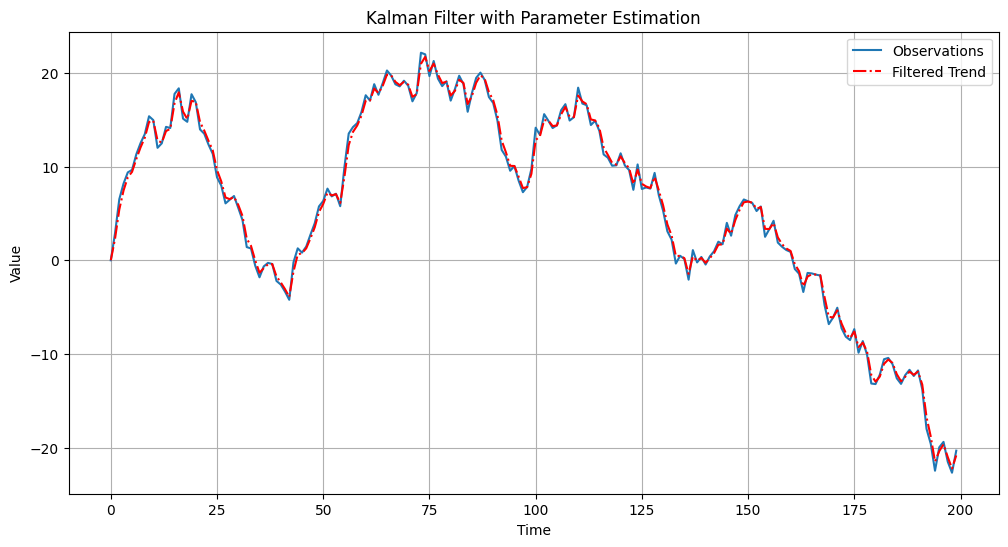

In [7]:
#2.
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 200  # number of time steps

# Initial guesses for parameters
mu_variance_guess = 2
e_variance_guess = 1

# Observed data
np.random.seed(0)
y = np.zeros(T)
for t in range(1, T):
    y[t] = y[t-1] + np.random.normal(0, np.sqrt(mu_variance_guess)) + np.random.normal(0, np.sqrt(e_variance_guess))

# Kalman filter and smoother with parameter estimation
def kalman_filter(y, mu_variance_guess, e_variance_guess):
    T = len(y)
    mu_pred = np.zeros(T)
    mu_filt = np.zeros(T)
    mu_pred[0] = y[0]
    mu_filt[0] = y[0]
    Q = mu_variance_guess
    R = e_variance_guess
    P_pred = np.zeros(T)
    P_filt = np.zeros(T)
    P_pred[0] = Q
    P_filt[0] = Q

    for t in range(1, T):
        # Prediction
        mu_pred[t] = mu_filt[t-1]
        P_pred[t] = P_filt[t-1] + Q
        
        # Kalman gain
        K = P_pred[t] / (P_pred[t] + R)
        
        # Update
        mu_filt[t] = mu_pred[t] + K * (y[t] - mu_pred[t])
        P_filt[t] = (1 - K) * P_pred[t]
        
        # Update parameters (EM algorithm)
        mu_variance_guess = np.var(mu_filt)
        e_variance_guess = np.mean((y - mu_filt) ** 2)
    
    print("Parameter Estimates:")
    print("Trend Variance (μ variance):", mu_variance_guess)
    print("Observation Variance (ε variance):", e_variance_guess)

    return mu_filt

# Run Kalman filter with parameter estimation
mu_filt = kalman_filter(y, mu_variance_guess, e_variance_guess)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(range(T), y, label='Observations')
plt.plot(range(T), mu_filt, label='Filtered Trend', linestyle='-.', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Kalman Filter with Parameter Estimation')
plt.legend()
plt.grid(True)
plt.show()

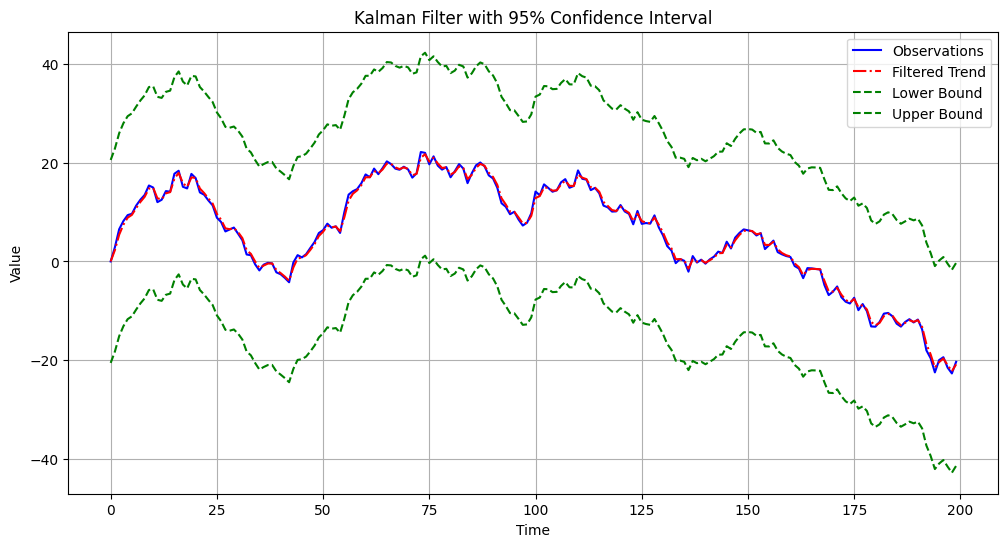

In [2]:
#3.
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 200  # number of time steps

# Initial guesses for parameters
mu_variance_guess = 2
e_variance_guess = 1

# Observed data
np.random.seed(0)
y = np.zeros(T)
for t in range(1, T):
    y[t] = y[t-1] + np.random.normal(0, np.sqrt(mu_variance_guess)) + np.random.normal(0, np.sqrt(e_variance_guess))

# Kalman filter and smoother with parameter estimation
def kalman_filter(y, mu_variance_guess, e_variance_guess):
    T = len(y)
    mu_pred = np.zeros(T)
    mu_filt = np.zeros(T)
    mu_pred[0] = y[0]
    mu_filt[0] = y[0]
    Q = mu_variance_guess
    R = e_variance_guess
    P_pred = np.zeros(T)
    P_filt = np.zeros(T)
    P_pred[0] = Q
    P_filt[0] = Q

    for t in range(1, T):
        # Prediction
        mu_pred[t] = mu_filt[t-1]
        P_pred[t] = P_filt[t-1] + Q
        
        # Kalman gain
        K = P_pred[t] / (P_pred[t] + R)
        
        # Update
        mu_filt[t] = mu_pred[t] + K * (y[t] - mu_pred[t])
        P_filt[t] = (1 - K) * P_pred[t]
        
        # Update parameters (EM algorithm)
        mu_variance_guess = np.var(mu_filt)
        e_variance_guess = np.mean((y - mu_filt) ** 2)
    
    return mu_filt, mu_variance_guess

# Run Kalman filter with parameter estimation
mu_filt, mu_variance = kalman_filter(y, mu_variance_guess, e_variance_guess)

# Calculate 95% confidence interval for mu using mu_variance
z_score = 1.96  # 95% confidence interval
mu_lower = mu_filt - z_score * np.sqrt(mu_variance)
mu_upper = mu_filt + z_score * np.sqrt(mu_variance)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(range(T), y, label='Observations', color='blue')
plt.plot(range(T), mu_filt, label='Filtered Trend', linestyle='-.', color='red')
plt.plot(range(T), mu_lower, label='Lower Bound', linestyle='--', color='green')
plt.plot(range(T), mu_upper, label='Upper Bound', linestyle='--', color='green')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Kalman Filter with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()